# <img src="uni-logo.png" alt="Logo UNI" width=150 hight=300 align="right">


<br><br><br>
<h1><font color="#7F000E" size=4>Minería de Datos (CC442)</font></h1>



<h1><font color="#7F000E" size=6>Demo: KD-Tree</font></h1>

<br>
<div style="text-align: right">
<font color="#7F000E" size=3>Yuri Coicca, M.Sc.</font><br>
<font color="#7F000E" size=3>Facultad de Ciencias</font><br>
<font color="#7F000E" size=3>Ciencia de la Computación - UNI</font><br>
</div>

--- EJEMPLO 1: Búsqueda de Vecinos con KD-Tree (2D) ---
Punto buscado: [0.5 0.5]
Índices de vecinos encontrados: [23 19  8]
Distancias: [0.18935534 0.19370992 0.19731695]


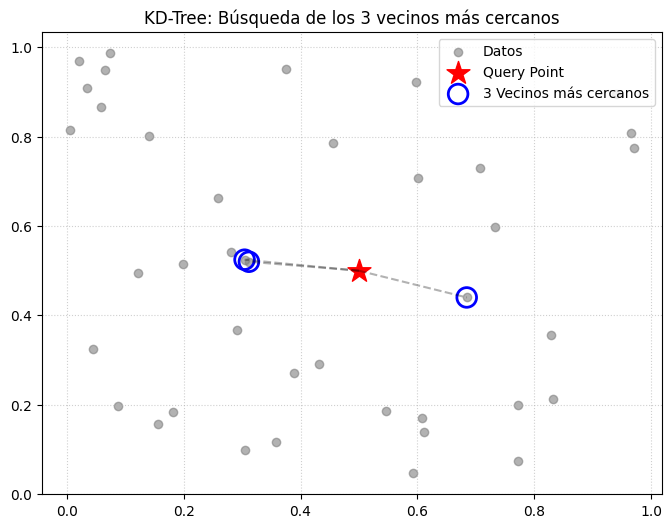


--- EJEMPLO 2: 'Color Matching' usando Espacio RGB (3D) ---

Resultados del Color Matching:
Color Input (RGB)    -> Color Paleta Detectado (Distancia)
------------------------------------------------------------
[250  10  10]        -> Rojo            (15.00)
[10 10 10]           -> Negro           (17.32)
[130 130 140]        -> Gris            (12.33)
[200 200  50]        -> Amarillo        (92.47)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KDTree

# ======================================================
# EJEMPLO 1: BÚSQUEDA ESPACIAL EN 2D
# ======================================================
print("--- EJEMPLO 1: Búsqueda de Vecinos con KD-Tree (2D) ---")

# 1. Generamos datos sintéticos (Puntos aleatorios)
np.random.seed(42)
points_2d = np.random.rand(40, 2)  # 40 puntos en un plano 2D (x, y)

# 2. Construcción del KD-Tree
# leaf_size=2: Obliga al árbol a dividir mucho el espacio (crea muchas ramas).
# metric='euclidean': KD-Tree funciona perfecto con distancia euclidiana.
tree = KDTree(points_2d, leaf_size=2, metric='euclidean')

# 3. Punto de consulta (Un punto nuevo al azar)
query_point = np.array([[0.5, 0.5]])

# 4. Consultar al árbol: Buscar los 3 vecinos más cercanos
k = 3
distancias, indices = tree.query(query_point, k=k)

print(f"Punto buscado: {query_point[0]}")
print(f"Índices de vecinos encontrados: {indices[0]}")
print(f"Distancias: {distancias[0]}")

# --- VISUALIZACIÓN ---
plt.figure(figsize=(8, 6))
# Todos los puntos (Gris)
plt.scatter(points_2d[:, 0], points_2d[:, 1], c='gray', label='Datos', alpha=0.6)
# Punto objetivo (Rojo)
plt.scatter(query_point[:, 0], query_point[:, 1], c='red', marker='*', s=300, label='Query Point')
# Vecinos encontrados (Círculos azules vacíos)
vecinos = points_2d[indices[0]]
plt.scatter(vecinos[:, 0], vecinos[:, 1], s=200, facecolors='none', edgecolors='blue', linewidths=2, label=f'{k} Vecinos más cercanos')

# Dibujar líneas conectando el punto con sus vecinos
for i in range(k):
    plt.plot([query_point[0,0], vecinos[i,0]], [query_point[0,1], vecinos[i,1]], 'k--', alpha=0.3)

plt.title(f'KD-Tree: Búsqueda de los {k} vecinos más cercanos')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()


# ======================================================
# EJEMPLO 2: APLICACIÓN REAL (Color Matching en 3D)
# ======================================================
print("\n--- EJEMPLO 2: 'Color Matching' usando Espacio RGB (3D) ---")
# El KD-Tree es excelente para buscar en 3 dimensiones (R, G, B).

# 1. Definimos una "Paleta de Colores" conocida (Datos de entrenamiento)
# Formato: [R, G, B] donde cada valor va de 0 a 255
palette_names = ['Rojo', 'Verde', 'Azul', 'Amarillo', 'Negro', 'Blanco', 'Gris', 'Cyan', 'Magenta']
palette_rgb = np.array([
    [255, 0, 0],    # Rojo
    [0, 255, 0],    # Verde
    [0, 0, 255],    # Azul
    [255, 255, 0],  # Amarillo
    [0, 0, 0],      # Negro
    [255, 255, 255],# Blanco
    [128, 128, 128],# Gris
    [0, 255, 255],  # Cyan
    [255, 0, 255]   # Magenta
])

# 2. Construimos el árbol con la paleta
color_tree = KDTree(palette_rgb, metric='euclidean')

# 3. Colores misteriosos (Inputs nuevos)
# Queremos saber a qué color de nuestra paleta se parecen más estos colores.
mystery_colors = np.array([
    [250, 10, 10],   # Casi Rojo puro
    [10, 10, 10],    # Casi Negro (Gris muy oscuro)
    [130, 130, 140], # Un gris azulado
    [200, 200, 50]   # Un amarillo oscuro/mostaza
])

# 4. Buscamos el vecino más cercano (k=1) para cada color misterioso
dists, idxs = color_tree.query(mystery_colors, k=1)

print("\nResultados del Color Matching:")
print(f"{'Color Input (RGB)':<20} -> {'Color Paleta Detectado':<15} (Distancia)")
print("-" * 60)

for i in range(len(mystery_colors)):
    input_c = mystery_colors[i]
    matched_idx = idxs[i][0]
    matched_name = palette_names[matched_idx]
    distance = dists[i][0]
    
    print(f"{str(input_c):<20} -> {matched_name:<15} ({distance:.2f})")

# Nota: Una distancia baja significa que el color es muy similar.